In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import sys
if '..' not in sys.path:
    sys.path.insert(0,'..')

In [28]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=12_500, n_features=30, n_informative=8, n_redundant=8, shuffle=False, random_state=42)
X = pd.DataFrame(X, columns=[f'feat_{idx}' for idx in range(X.shape[1])])
y = pd.Series(y)

from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.2)
X_tr = X_tr.reset_index(drop=True)
X_ts = X_ts.reset_index(drop=True)
y_tr = y_tr.reset_index(drop=True)
y_ts = y_ts.reset_index(drop=True)

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  39 out of  45 | elapsed:  1.9min remaining:   17.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.0min finished


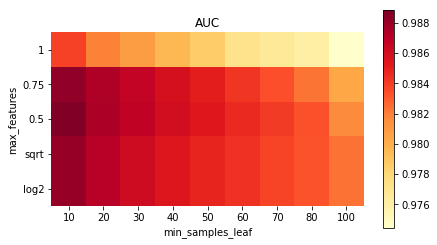

({'class_weight': 'balanced',
  'max_features': 0.5,
  'min_samples_leaf': 10,
  'n_estimators': 200,
  'n_jobs': -1,
  'random_state': 42},
 0.9888307681294867)

In [19]:
from ml_tools.optimization.classification import optimize_rf
optimize_rf(X_tr, y_tr)

In [29]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=500, class_weight='balanced', max_features=.5, min_samples_leaf=10)

from ml_tools.evaluation.classification import evaluate
evaluate(model_rf, X_tr, y_tr, X_ts, y_ts, imp=True)

,tr,vl
roc_auc,0.996979,0.984036
log_loss,0.129413,0.185731
f1-score,0.976479,0.946837


,0
Feature,
feat_7,0.228999
feat_6,0.222184
feat_13,0.144312
feat_4,0.127776
feat_15,0.106529
feat_10,0.067244
feat_5,0.040308
feat_2,0.024013
feat_11,0.018640


Weight,Feature
0.0881 ± 0.0088,feat_7
0.0849 ± 0.0125,feat_6
0.0609 ± 0.0056,feat_13
0.0495 ± 0.0043,feat_4
0.0372 ± 0.0045,feat_15
0.0288 ± 0.0058,feat_10
0.0153 ± 0.0042,feat_5
0.0089 ± 0.0024,feat_2
0.0071 ± 0.0029,feat_11
0.0048 ± 0.0012,feat_14


In [105]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=500, class_weight='balanced', max_features='sqrt', min_samples_leaf=30)

from ml_tools.feature_selection.permutation_importance import PermImpElimination
perm = PermImpElimination(model_rf, X_tr, y_tr)
perm.fit(X_ts, y_ts)

dropped: feat_0 -0.0018964694566007394
dropped: feat_13 -0.0009567460995205028
dropped: feat_19 -0.0008743566992932365
dropped: feat_17 -0.0007028010597763692
dropped: feat_10 -0.0011222090025390882
dropped: feat_11 -0.0028141502262295013
dropped: feat_9 -0.0011562789603248615
dropped: feat_18 -0.00046319543517330734
dropped: feat_5 -0.0002727374650483033
dropped: feat_16 -0.0010354213591979343
dropped: feat_8 -0.0009449577102639728


In [4]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=500, class_weight='balanced', max_features=.5, min_samples_leaf=10)

from ml_tools.feature_selection.permutation_importance import PermImpEliminationEli5
perm = PermImpEliminationEli5(model_rf, X_tr, y_tr)
perm.fit(X_ts, y_ts)

In [9]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=500, class_weight='balanced', max_features=.5, min_samples_leaf=10)

from ml_tools.evaluation.classification import evaluate
evaluate(model_rf, X_tr, y_tr, X_ts, y_ts, imp=True)

,tr,vl
roc_auc,0.979106,0.938935
log_loss,0.212030,0.312648
f1-score,0.921790,0.851389


,0
Feature,
feat_1,1.073703
feat_5,0.092317
feat_12,0.061673
feat_19,0.058336
feat_9,0.048109
feat_0,0.035775
feat_13,0.028033
feat_15,0.023934
feat_14,0.016075


Weight,Feature
0.0336 ± 0.0125,feat_1
0.0017 ± 0.0017,feat_5
0.0011 ± 0.0015,feat_13
0.0010 ± 0.0020,feat_12
0.0009 ± 0.0009,feat_0
0.0009 ± 0.0022,feat_19
0.0004 ± 0.0018,feat_16
0.0003 ± 0.0024,feat_14
0.0002 ± 0.0024,feat_15
0.0002 ± 0.0032,feat_11
